In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error

In [2]:
data ={
    'X': list(range(1,21)),
    'Y': [2 * x**2 + 3 * x + 5 for x in range(1, 21)]
}
df= pd.DataFrame(data)

In [3]:
X = df[['X']]
y= df['Y']
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2 )


In [4]:
poly=PolynomialFeatures(degree=5)
X_poly_train=poly.fit_transform(X_train)
X_poly_test=poly.transform(X_test)

In [5]:
model = LinearRegression()
model.fit(X_poly_train, y_train)

LinearRegression()

In [6]:
y_pred_train = model.predict(X_poly_train)
y_pred_test = model.predict(X_poly_test)

In [7]:
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
print('LR Error M S E train {}', mse_train)
print('LR Error M S E test {}', mse_test)

LR Error M S E train {} 1.4716406824476148e-20
LR Error M S E test {} 1.6266287997881715e-20


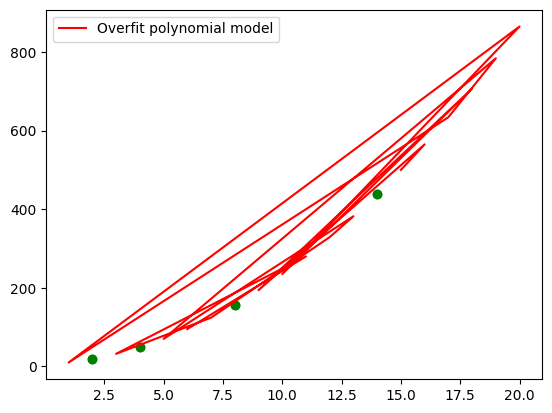

In [8]:
plt.scatter(X_test, y_test, color='green')
plt.scatter(X_test, y_test, color='green')
plt.plot(X_train, y_pred_train, color='red', label='Overfit polynomial model')

plt.legend()
plt.show()

In [9]:
lasso = Lasso(alpha=10)
lasso.fit(X_poly_train, y_train)
y_lasso_pred_train = lasso.predict(X_poly_train)
y_lasso_pred_test = lasso.predict(X_poly_test)
mse_train = mean_squared_error(y_train, y_lasso_pred_train)
mse_test = mean_squared_error(y_test, y_lasso_pred_test)
print('Lasso Error M S E train {}', mse_train)
print('Lasso Error M S E test {}', mse_test)

Lasso Error M S E train {} 2.9229258305135253
Lasso Error M S E test {} 3.3844185909221607


c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.778e+02, tolerance: 1.183e+02
  model = cd_fast.enet_coordinate_descent(


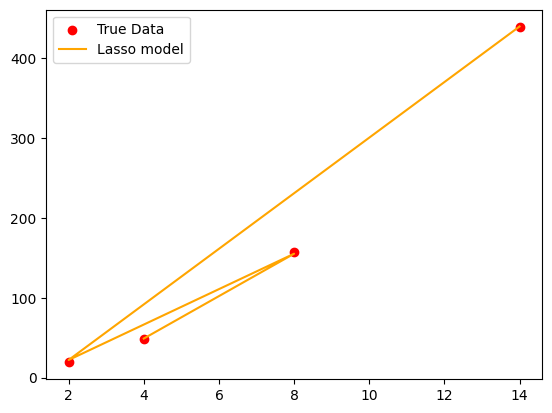

In [10]:
plt.scatter(X_test, y_test, color='red', label='True Data')
plt.plot(X_test, y_lasso_pred_test, color='orange', label='Lasso model')
plt.legend()
plt.show()

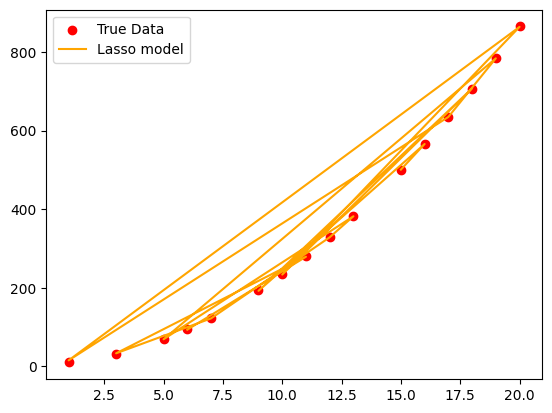

In [11]:
plt.scatter(X_train, y_train, color='red', label='True Data')
plt.plot(X_train, y_lasso_pred_train, color='orange', label='Lasso model')
plt.legend()
plt.show()

In [20]:
ridge = Ridge()
ridge.fit(X_poly_train,y_train)
y_ridge_pred_train = ridge.predict(X_poly_train)
y_ridge_pred_test = ridge.predict(X_poly_test)
ridge_mse_train = mean_squared_error(y_train,y_ridge_pred_train)
ridge_mse_test = mean_squared_error(y_test,y_ridge_pred_test)
print(f"ridge_mse_train : {ridge_mse_train}")
print(f"ridge_mse_test : {ridge_mse_test}")

ridge_mse_train : 0.050693507086572595
ridge_mse_test : 0.0656062644108246


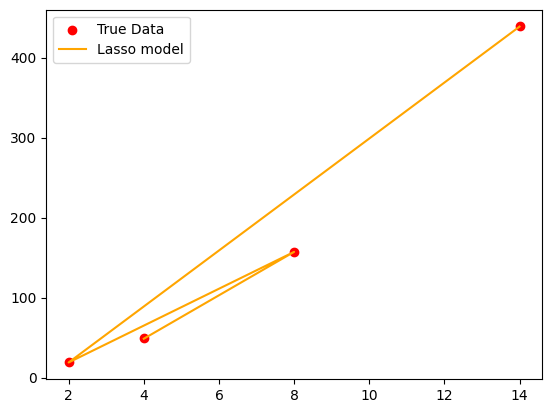

In [21]:
plt.scatter(X_test, y_test, color='red', label='True Data')
plt.plot(X_test, y_ridge_pred_test, color='orange', label='Lasso model')
plt.legend()
plt.show()

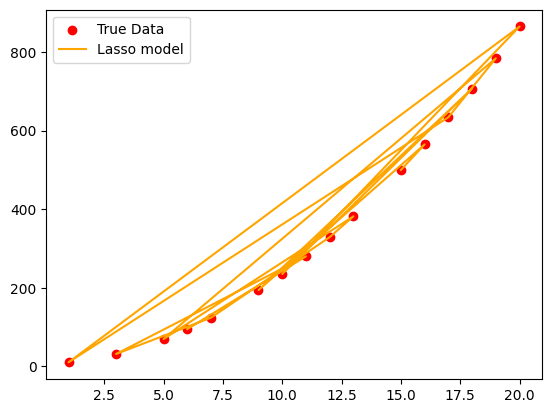

In [22]:
plt.scatter(X_train, y_train, color='red', label='True Data')
plt.plot(X_train, y_ridge_pred_train, color='orange', label='Lasso model')
plt.legend()
plt.show()